In [104]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv('dataset\merged_data.csv')
df

,Date,Time,Item_Code,Quantity_Sold_(kilo),Unit_Selling_Price_(RMB/kg),Sale_or_Return,Discount_(Yes/No),Wholesale_Price_(RMB/kg),Item_Name,Category_Code,Category_Name,Loss_Rate_(%)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,4.32,Paopaojiao (Jingpin),1011010504,Capsicum,7.08
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,2.10,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,22.27
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,4.32,Paopaojiao (Jingpin),1011010504,Capsicum,7.08
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,7.03,Shanghaiqing,1011010101,Flower/Leaf Vegetables,14.43
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,4.60,Caixin,1011010101,Flower/Leaf Vegetables,13.70
...,...,...,...,...,...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,sale,No,15.60,Xixia Black Mushroom (1),1011010801,Edible Mushroom,10.80
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,sale,No,7.00,Changxianqie,1011010501,Solanum,6.90
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,sale,No,15.60,Xixia Black Mushroom (1),1011010801,Edible Mushroom,10.80
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,sale,No,3.63,Wuhu Green Pepper (1),1011010504,Capsicum,5.70


In [106]:
df['Discount_(Yes/No)'] = df['Discount_(Yes/No)'].map({'No' : False, "Yes":True})
df['Discount_(Yes/No)'].value_counts()

Discount_(Yes/No)
False    831137
True      47366
Name: count, dtype: int64

Descriptive Statistics:

1. Total Sales

In [107]:
df = df.assign(total_sales = df['Quantity_Sold_(kilo)'] * df['Unit_Selling_Price_(RMB/kg)'])
df.head(5)

,Date,Time,Item_Code,Quantity_Sold_(kilo),Unit_Selling_Price_(RMB/kg),Sale_or_Return,Discount_(Yes/No),Wholesale_Price_(RMB/kg),Item_Name,Category_Code,Category_Name,Loss_Rate_(%),total_sales
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,False,4.32,Paopaojiao (Jingpin),1011010504,Capsicum,7.08,3.0096
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,False,2.10,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,22.27,2.7168
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,False,4.32,Paopaojiao (Jingpin),1011010504,Capsicum,7.08,3.1084
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,False,7.03,Shanghaiqing,1011010101,Flower/Leaf Vegetables,14.43,4.2100
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,False,4.60,Caixin,1011010101,Flower/Leaf Vegetables,13.70,4.3120


In [108]:

total_sales_per_day = df.groupby(['Date'])['total_sales'].sum().reset_index()
total_sales_per_day

,Date,total_sales
0,2020-07-01,3472.0136
1,2020-07-02,3456.5429
2,2020-07-03,3384.7701
3,2020-07-04,4394.8624
4,2020-07-05,4471.5748
...,...,...
1080,2023-06-26,1507.4716
1081,2023-06-27,1760.2499
1082,2023-06-28,1823.0318
1083,2023-06-29,2198.9108


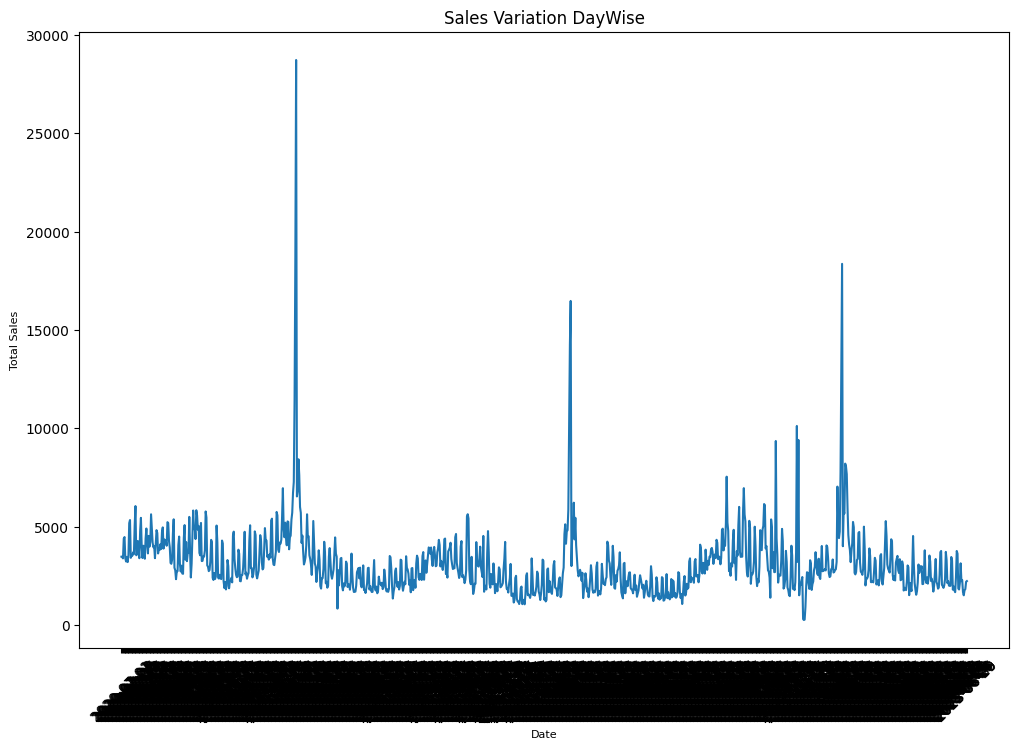

In [109]:
## plotting the sales data result

plt.figure(figsize = (12,8))
sns.lineplot(x= total_sales_per_day['Date'], y = total_sales_per_day['total_sales'])
plt.title("Sales Variation DayWise", size = 12)
plt.xlabel("Date", size = 8)
plt.xticks(rotation = 45)
plt.ylabel("Total Sales", size = 8)
plt.show()

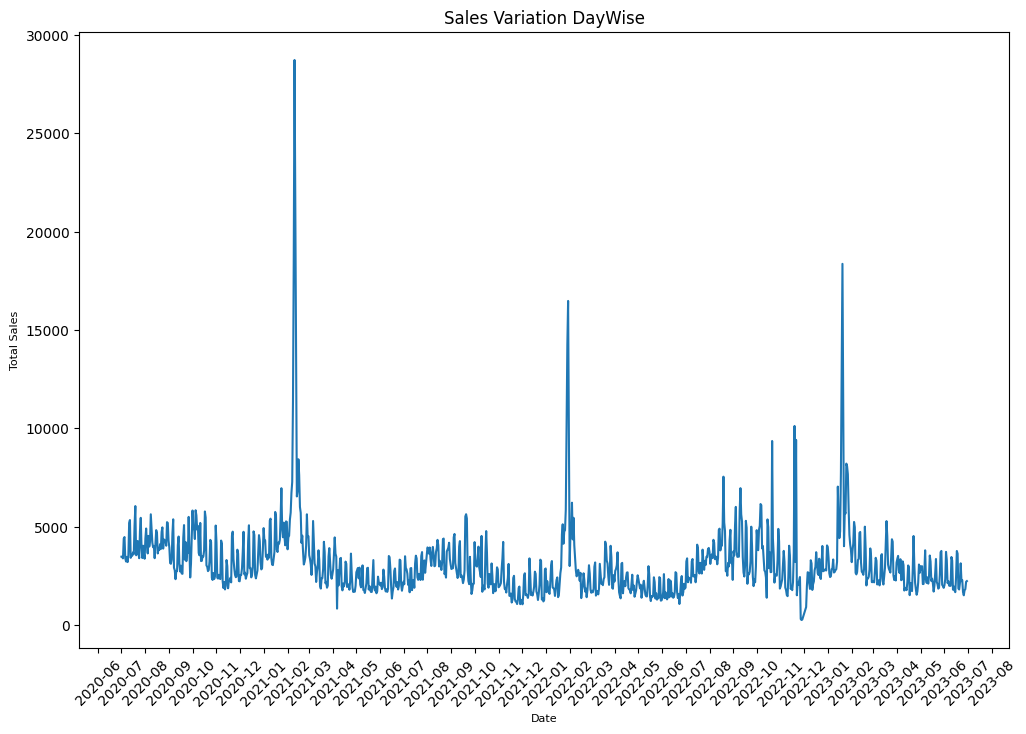

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import MonthLocator, DateFormatter


total_sales_per_day['Date'] = pd.to_datetime(total_sales_per_day['Date'])

plt.figure(figsize=(12, 8))
sns.lineplot(x=total_sales_per_day['Date'], y=total_sales_per_day['total_sales'])
plt.title("Sales Variation DayWise", size=12)
plt.xlabel("Date", size=8)
plt.ylabel("Total Sales", size=8)

# Set x-axis ticks to show every month
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))  # Customize date format if needed

plt.xticks(rotation=45)
plt.show()


2 Average Selling Price:

In [111]:
avg_selling_price_each_item = df.groupby(['Item_Name'])['Unit_Selling_Price_(RMB/kg)'].mean().reset_index().rename(columns = {"Unit_Selling_Price_(RMB/kg)" : "Avg_Selling_Price"})
avg_selling_price_each_item

,Item_Name,Avg_Selling_Price
0,7 Colour Pepper (1),21.258420
1,7 Colour Pepper (2),24.036767
2,7 Colour Pepper (Bag),5.055556
3,Agaricus Bisporus (Bag),7.980000
4,Agaricus Bisporus (Box),5.346078
...,...,...
237,Zhijiang Red Bolt,6.389384
238,Zhijiang Red Bolt (Bag),2.177636
239,Zhimaxiancai,6.000000
240,Zhuyecai,5.474429


In [112]:
## average selling price for each item and each category

avg_selling_price_each_category = df.groupby(['Category_Name'])['Unit_Selling_Price_(RMB/kg)'].mean().reset_index().rename(columns = {"Unit_Selling_Price_(RMB/kg)" : "Avg_Selling_Price"})
avg_selling_price_each_category

,Category_Name,Avg_Selling_Price
0,Aquatic Tuberous Vegetables,9.689851
1,Cabbage,9.138538
2,Capsicum,10.578216
3,Edible Mushroom,12.036941
4,Flower/Leaf Vegetables,6.317257
5,Solanum,8.695459


3 Top Selling Items

In [113]:
# Group the data by item code and sum the quantities sold
top_selling_items = df.groupby('Item_Code')['Quantity_Sold_(kilo)'].sum()

# Sort the items based on total quantity sold in descending order
top_selling_items = top_selling_items.sort_values(ascending=False)

# Select the top selling item (e.g., top 1)
top_item = top_selling_items.head(1)

print("Top Selling Item:")
print(top_item)


Top Selling Item:
Item_Code
102900011016701    28164.331
Name: Quantity_Sold_(kilo), dtype: float64


In [114]:
import pandas as pd

# Group the data by item code and item name and sum the quantities sold
top_selling_items = df.groupby(['Item_Code', 'Item_Name'])['Quantity_Sold_(kilo)'].sum()

# Sort the items based on total quantity sold in descending order
top_selling_items = top_selling_items.sort_values(ascending=False)

# Select the top selling item (e.g., top 1)
top_item = top_selling_items.head(1)

print("Top Selling Item:")
print(top_item)


Top Selling Item:
Item_Code        Item_Name            
102900011016701  Wuhu Green Pepper (1)    28164.331
Name: Quantity_Sold_(kilo), dtype: float64


Time-based Analysis:

1. Peak sales time

In [115]:
df.dtypes

Date                            object
Time                            object
Item_Code                        int64
Quantity_Sold_(kilo)           float64
Unit_Selling_Price_(RMB/kg)    float64
Sale_or_Return                  object
Discount_(Yes/No)                 bool
Wholesale_Price_(RMB/kg)       float64
Item_Name                       object
Category_Code                    int64
Category_Name                   object
Loss_Rate_(%)                  float64
total_sales                    float64
dtype: object

In [116]:
df['Time'] = pd.to_datetime(df['Time']) 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10632\3950066751.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [117]:
df.dtypes

Date                                   object
Time                           datetime64[ns]
Item_Code                               int64
Quantity_Sold_(kilo)                  float64
Unit_Selling_Price_(RMB/kg)           float64
Sale_or_Return                         object
Discount_(Yes/No)                        bool
Wholesale_Price_(RMB/kg)              float64
Item_Name                              object
Category_Code                           int64
Category_Name                          object
Loss_Rate_(%)                         float64
total_sales                           float64
dtype: object

In [118]:
highest_sales_in_day = df.groupby((df['Time']).dt.hour)['total_sales'].max().reset_index().rename(columns = {"Time" : "Hour"})
highest_sales_in_day

,Hour,total_sales
0,8,3.9100
1,9,944.0000
2,10,100.0000
3,11,297.0000
4,12,49.4912
5,13,180.0000
6,14,38.7000
7,15,204.0000
8,16,44.2800
9,17,99.5004


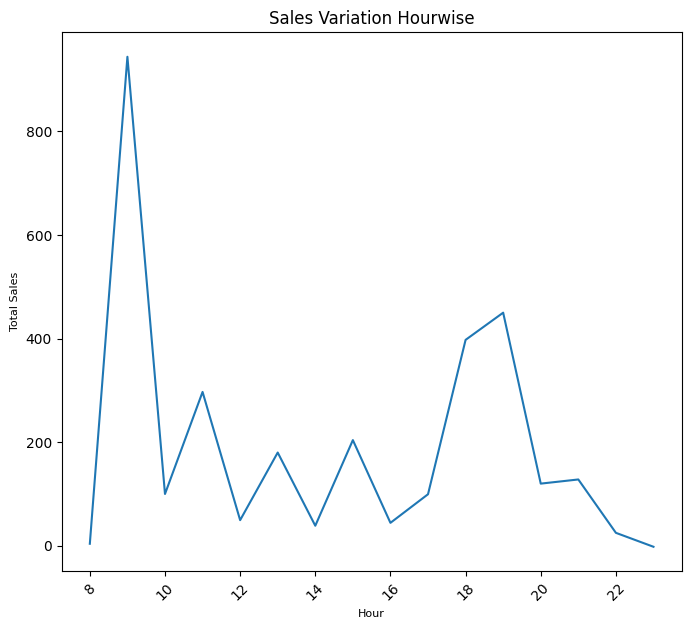

In [122]:


plt.figure(figsize = (8,7))
sns.lineplot(x= highest_sales_in_day['Hour'], y = highest_sales_in_day['total_sales'])
plt.title("Sales Variation Hourwise", size = 12)
plt.xlabel("Hour", size = 8)
plt.xticks(rotation = 45)
plt.ylabel("Total Sales", size = 8)
plt.show()

In [ ]:
result = highest_sales_in_day.sort_values(by = 'total_sales', ascending = False).iloc[:1, :]
result

,Hour,total_sales
1,9,944.0
